<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Stacked Charts**


Estimated time needed: **45** minutes


In this lab, you will focus on visualizing data specifically using stacked charts. You will use SQL queries to extract the necessary data and apply stacked charts to analyze the composition and comparison within the data.


## Objectives


In this lab, you will perform the following:


- Visualize the composition of data using stacked charts.

- Compare multiple variables across different categories using stacked charts.

- Analyze trends within stacked chart visualizations.


## Setup: Downloading and Loading the Data
**Install the libraries**


In [1]:
!pip install pandas

In [2]:
!pip install matplotlib


**Download and Load the Data**


To start, download and load the dataset into a `pandas` DataFrame.



### Step 1: Download the dataset


In [3]:
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

--2025-05-07 08:47:14--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  76.3MB/s    in 2.0s    

2025-05-07 08:47:16 (76.3 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



### Step 2: Import necessary libraries and load the dataset


In [4]:
import pandas as pd
import matplotlib.pyplot as plt

### Load the data


In [5]:
df = pd.read_csv("survey-data.csv")

### Display the first few rows of the data to understand its structure


In [6]:
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Stacked Chart for Composition of Job Satisfaction Across Age Groups


##### 1. Stacked Chart of Median `JobSatPoints_6` and `JobSatPoints_7` for Different Age Groups


Visualize the composition of job satisfaction scores (`JobSatPoints_6` and `JobSatPoints_7`) across various age groups. This will help in understanding the breakdown of satisfaction levels across different demographics.



--2025-05-07 08:54:08--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  68.6MB/s    in 2.2s    

2025-05-07 08:54:10 (68.6 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]

Row count after loading: 65437
Columns: ['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check', 'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline', 'TechDoc', 'YearsCode', 'YearsCodePro', 'DevType', 'OrgSize', 'PurchaseInfluence', 'BuyNewTool', 'BuildvsBuy

/opt/conda/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


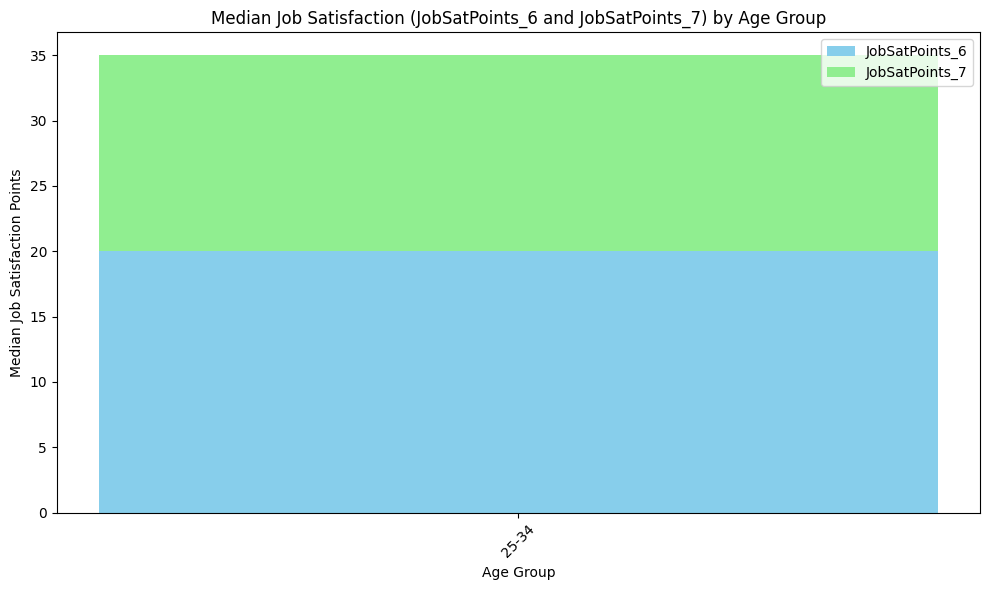

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Step 1: Download the dataset
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

# Verify file exists
if not os.path.exists("survey-data.csv"):
    print("Error: survey-data.csv not found. Check download URL or file path.")
    exit()

# Step 2: Load the dataset
try:
    df = pd.read_csv("survey-data.csv")
except Exception as e:
    print(f"Error loading CSV: {e}")
    exit()

# Step 3: Check if DataFrame is empty
print("Row count after loading:", len(df))
print("Columns:", df.columns.tolist())
print("First few rows:\n", df.head())

if df.empty:
    print("Error: DataFrame is empty. Check CSV file content or loading process.")
    exit()

# Step 4: Check required columns
required_columns = ['Age', 'JobSatPoints_6', 'JobSatPoints_7']
missing_columns = [col for col in required_columns if col not in df.columns]
if missing_columns:
    print(f"Error: Missing columns: {missing_columns}")
    exit()

# Step 5: Debug data
print("Initial missing values:\n", df[['Age', 'JobSatPoints_6', 'JobSatPoints_7']].isna().sum())
print("Age unique values:", df['Age'].unique())
print("JobSatPoints_6 sample:", df['JobSatPoints_6'].head().tolist())
print("JobSatPoints_7 sample:", df['JobSatPoints_7'].head().tolist())

# Step 6: Convert and impute
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
age_median = df['Age'].median()
if pd.isna(age_median):
    age_median = 30  # Fallback default
df['Age'] = df['Age'].fillna(age_median)
print("Age median:", age_median)

df['JobSatPoints_6'] = pd.to_numeric(df['JobSatPoints_6'], errors='coerce')
df['JobSatPoints_7'] = pd.to_numeric(df['JobSatPoints_7'], errors='coerce')
job_sat_6_median = df['JobSatPoints_6'].median()
job_sat_7_median = df['JobSatPoints_7'].median()
if pd.isna(job_sat_6_median):
    job_sat_6_median = 0
if pd.isna(job_sat_7_median):
    job_sat_7_median = 0
df['JobSatPoints_6'] = df['JobSatPoints_6'].fillna(job_sat_6_median)
df['JobSatPoints_7'] = df['JobSatPoints_7'].fillna(job_sat_7_median)
print("JobSatPoints_6 median:", job_sat_6_median)
print("JobSatPoints_7 median:", job_sat_7_median)

# Step 7: Create age groups
bins = [0, 18, 25, 35, 45, 55, 65, 100]
labels = ['Under 18', '18-24', '25-34', '35-44', '45-54', '55-64', '65+']
df['AgeCategory'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
print("AgeCategory value counts:\n", df['AgeCategory'].value_counts(dropna=False))

# Step 8: Group and plot
age_group_satisfaction = df.groupby('AgeCategory', observed=False)[['JobSatPoints_6', 'JobSatPoints_7']].median().reset_index()
print("Grouped data:\n", age_group_satisfaction)

if age_group_satisfaction.empty or age_group_satisfaction[['JobSatPoints_6', 'JobSatPoints_7']].isna().all().all():
    print("Error: No valid data to plot. Check Age and JobSatPoints values.")
else:
    plt.figure(figsize=(10, 6))
    plt.bar(age_group_satisfaction['AgeCategory'], 
            age_group_satisfaction['JobSatPoints_6'], 
            label='JobSatPoints_6', 
            color='skyblue')
    plt.bar(age_group_satisfaction['AgeCategory'], 
            age_group_satisfaction['JobSatPoints_7'], 
            bottom=age_group_satisfaction['JobSatPoints_6'], 
            label='JobSatPoints_7', 
            color='lightgreen')
    plt.xlabel('Age Group')
    plt.ylabel('Median Job Satisfaction Points')
    plt.title('Median Job Satisfaction (JobSatPoints_6 and JobSatPoints_7) by Age Group')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

##### Stacked Chart of `JobSatPoints_6` and `JobSatPoints_7` for Employment Status


Create a stacked chart to compare job satisfaction (`JobSatPoints_6` and `JobSatPoints_7`) across different employment statuses. This will show how satisfaction varies by employment type.


--2025-05-07 09:05:29--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  55.1MB/s    in 2.8s    

2025-05-07 09:05:32 (55.1 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]

Row count: 65437
Columns: ['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check', 'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline', 'TechDoc', 'YearsCode', 'YearsCodePro', 'DevType', 'OrgSize', 'PurchaseInfluence', 'BuyNewTool', 'BuildvsBuy', 'TechEndors

/tmp/ipykernel_833/1539467045.py:97: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


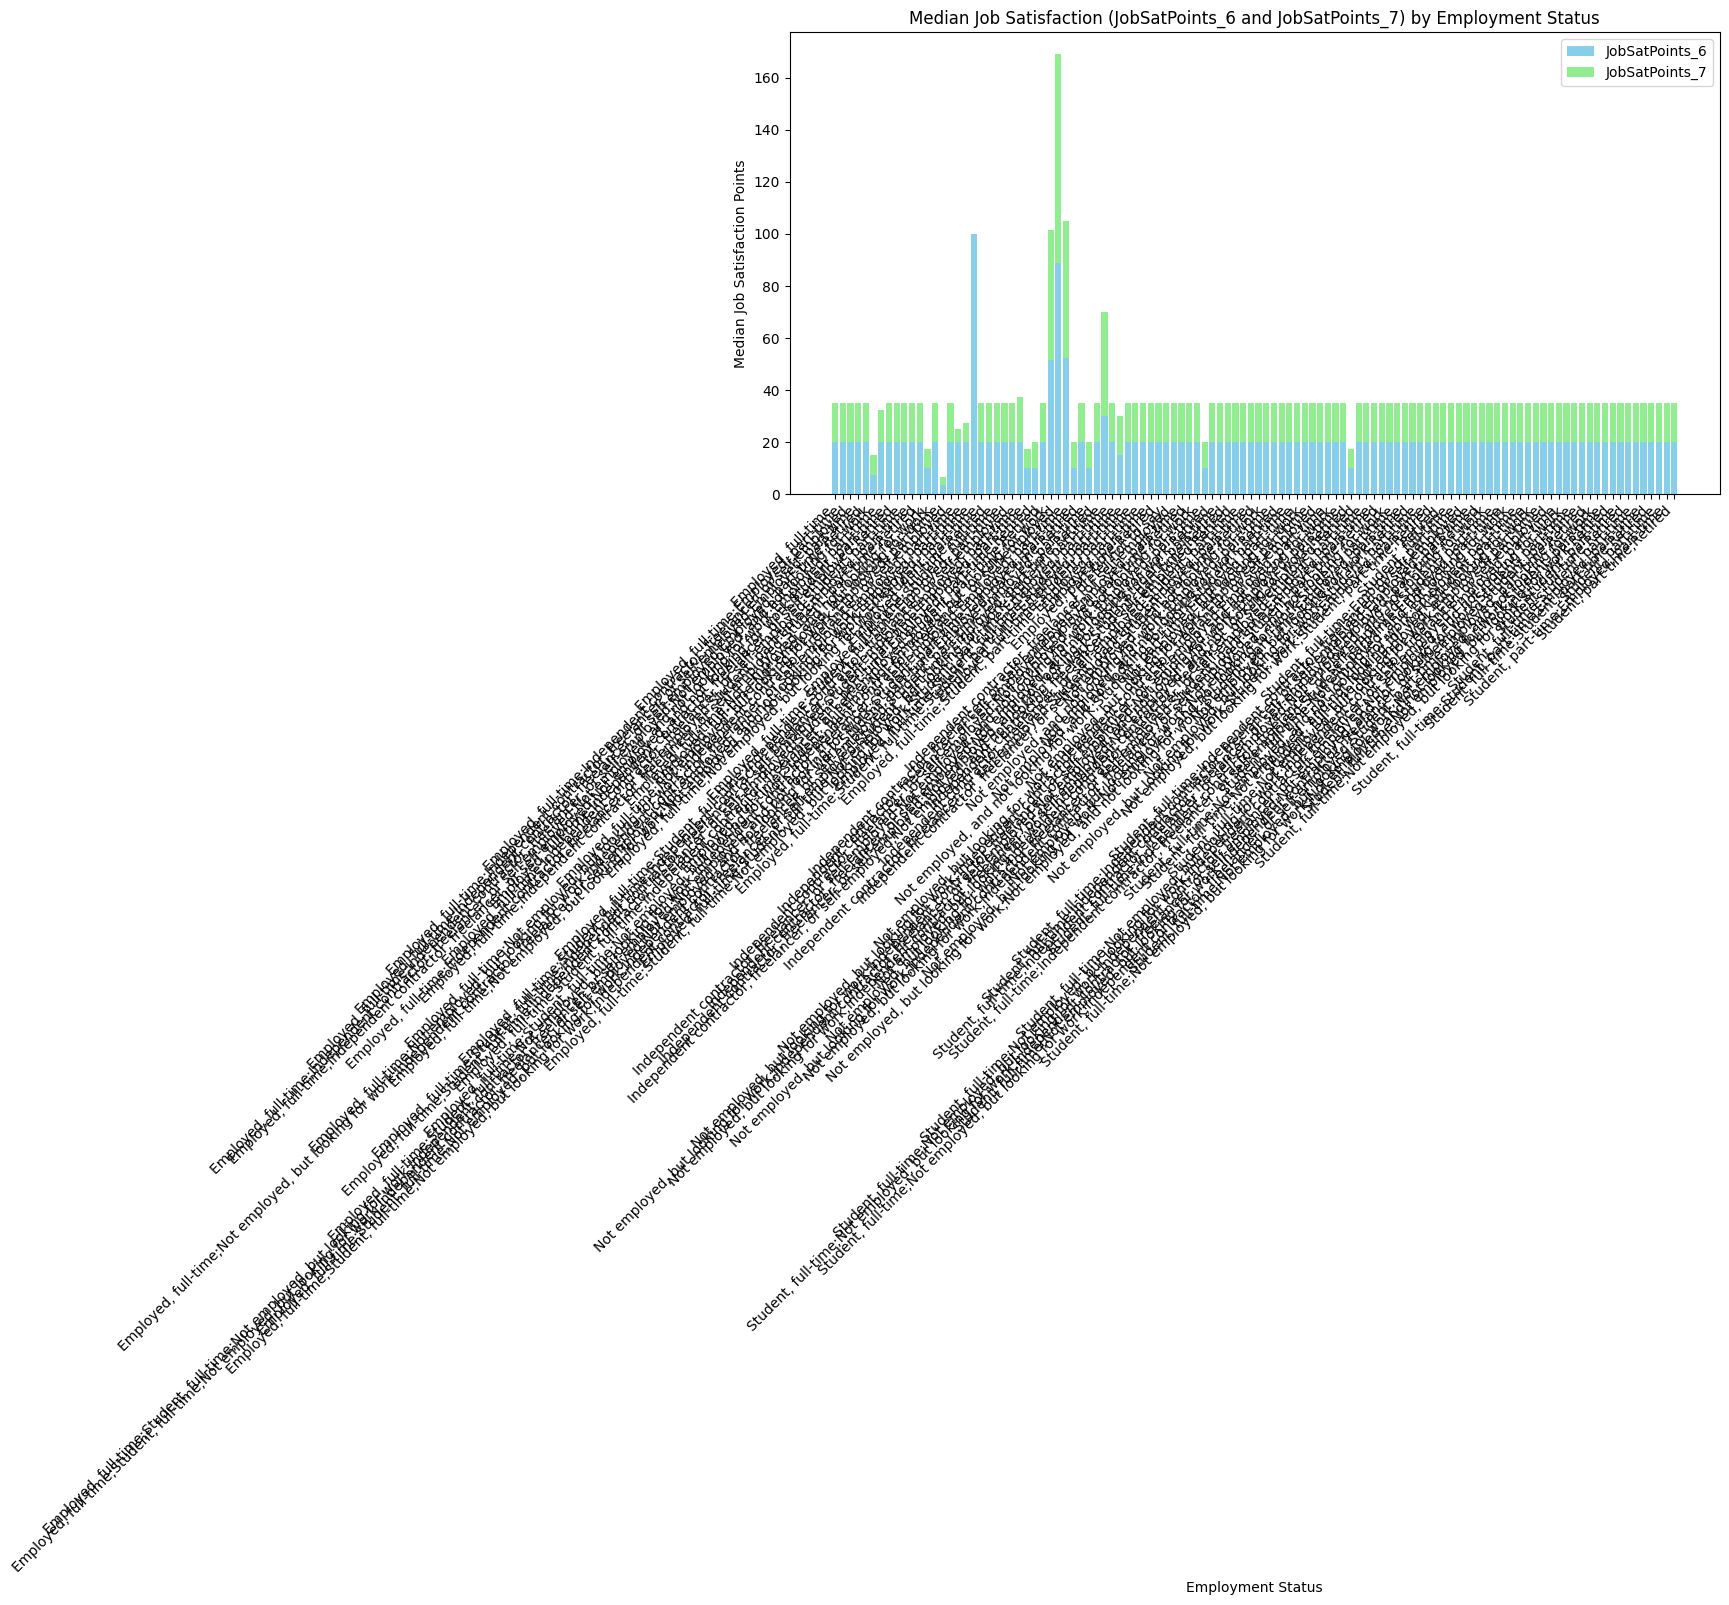

In [13]:
##Write your code here
import pandas as pd
import matplotlib.pyplot as plt
import os

# Step 1: Download the dataset
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

# Verify file exists
if not os.path.exists("survey-data.csv"):
    print("Error: survey-data.csv not found. Check download URL or file path.")
    exit()

# Step 2: Load the dataset
try:
    df = pd.read_csv("survey-data.csv")
except Exception as e:
    print(f"Error loading CSV: {e}")
    exit()

# Step 3: Check DataFrame
print("Row count:", len(df))
print("Columns:", df.columns.tolist())
print("First few rows:\n", df.head())

if df.empty:
    print("Error: DataFrame is empty. Check CSV file content or loading process.")
    exit()

# Step 4: Identify employment status column
employment_col = None
possible_employment_cols = ['Employment', 'EmploymentStatus', 'MainBranch', 'EmpStatus']
for col in possible_employment_cols:
    if col in df.columns:
        employment_col = col
        break

if not employment_col:
    print("Error: No employment status column found. Possible columns:", df.columns.tolist())
    exit()

print(f"Using employment status column: {employment_col}")
print(f"{employment_col} unique values:", df[employment_col].unique())

# Step 5: Check required columns
required_columns = [employment_col, 'JobSatPoints_6', 'JobSatPoints_7']
missing_columns = [col for col in required_columns if col not in df.columns]
if missing_columns:
    print(f"Error: Missing columns: {missing_columns}")
    exit()

# Step 6: Debug data
print("Initial missing values:\n", df[[employment_col, 'JobSatPoints_6', 'JobSatPoints_7']].isna().sum())
print("JobSatPoints_6 sample:", df['JobSatPoints_6'].head().tolist())
print("JobSatPoints_7 sample:", df['JobSatPoints_7'].head().tolist())

# Step 7: Convert and impute
df['JobSatPoints_6'] = pd.to_numeric(df['JobSatPoints_6'], errors='coerce')
df['JobSatPoints_7'] = pd.to_numeric(df['JobSatPoints_7'], errors='coerce')

job_sat_6_median = df['JobSatPoints_6'].median()
job_sat_7_median = df['JobSatPoints_7'].median()
if pd.isna(job_sat_6_median):
    job_sat_6_median = 0
if pd.isna(job_sat_7_median):
    job_sat_7_median = 0

df['JobSatPoints_6'] = df['JobSatPoints_6'].fillna(job_sat_6_median)
df['JobSatPoints_7'] = df['JobSatPoints_7'].fillna(job_sat_7_median)
print("JobSatPoints_6 median:", job_sat_6_median)
print("JobSatPoints_7 median:", job_sat_7_median)
print("Missing values after imputation:\n", df[[employment_col, 'JobSatPoints_6', 'JobSatPoints_7']].isna().sum())

# Step 8: Group by employment status
employment_satisfaction = df.groupby(employment_col)[['JobSatPoints_6', 'JobSatPoints_7']].median().reset_index()
print("Grouped data:\n", employment_satisfaction)

# Step 9: Plot
if employment_satisfaction.empty or employment_satisfaction[['JobSatPoints_6', 'JobSatPoints_7']].isna().all().all():
    print("Error: No valid data to plot. Check employment status and JobSatPoints values.")
else:
    plt.figure(figsize=(12, 6))
    plt.bar(employment_satisfaction[employment_col], 
            employment_satisfaction['JobSatPoints_6'], 
            label='JobSatPoints_6', 
            color='skyblue')
    plt.bar(employment_satisfaction[employment_col], 
            employment_satisfaction['JobSatPoints_7'], 
            bottom=employment_satisfaction['JobSatPoints_6'], 
            label='JobSatPoints_7', 
            color='lightgreen')
    plt.xlabel('Employment Status')
    plt.ylabel('Median Job Satisfaction Points')
    plt.title('Median Job Satisfaction (JobSatPoints_6 and JobSatPoints_7) by Employment Status')
    plt.legend()
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

### Task 2: Stacked Chart for Compensation and Job Satisfaction by Age Group


##### This stacked chart visualizes the composition of compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`) specifically for respondents aged 30-35.


Row count: 65437
Age unique values: ['Under 18 years old' '35-44 years old' '45-54 years old'
 '18-24 years old' '25-34 years old' '55-64 years old' 'Prefer not to say'
 '65 years or older']
Median values: {'ConvertedCompYearly': np.float64(65000.0), 'JobSatPoints_6': np.float64(20.0)}


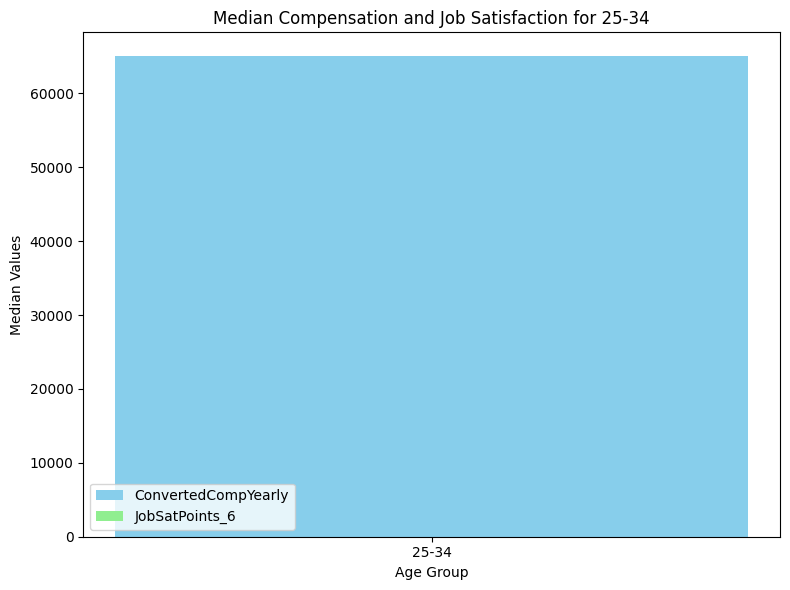

In [14]:
##Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("survey-data.csv")
print("Row count:", len(df))
print("Age unique values:", df['Age'].unique())

# Impute missing values
df['ConvertedCompYearly'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce').fillna(df['ConvertedCompYearly'].median())
df['JobSatPoints_6'] = pd.to_numeric(df['JobSatPoints_6'], errors='coerce').fillna(df['JobSatPoints_6'].median())

# Filter for 25-34 category (adjust based on actual category)
df_30_35 = df[df['Age'] == '25-34 years old']
age_label = '25-34'

# Aggregate medians
medians = {
    'ConvertedCompYearly': df_30_35['ConvertedCompYearly'].median(),
    'JobSatPoints_6': df_30_35['JobSatPoints_6'].median()
}
print("Median values:", medians)

# Plot
if pd.isna(medians['ConvertedCompYearly']) or pd.isna(medians['JobSatPoints_6']):
    print("Error: No valid data to plot.")
else:
    plt.figure(figsize=(8, 6))
    plt.bar([age_label], medians['ConvertedCompYearly'], label='ConvertedCompYearly', color='skyblue')
    plt.bar([age_label], medians['JobSatPoints_6'], bottom=medians['ConvertedCompYearly'], label='JobSatPoints_6', color='lightgreen')
    plt.xlabel('Age Group')
    plt.ylabel('Median Values')
    plt.title(f'Median Compensation and Job Satisfaction for {age_label}')
    plt.legend()
    plt.tight_layout()
    plt.show()

##### Stacked Chart of Median Compensation and Job Satisfaction Across Age Group


Compare the median compensation and job satisfaction metrics across different age groups. This helps visualize how compensation and satisfaction levels differ by age.


Row count: 65437
Age unique values: ['Under 18 years old' '35-44 years old' '45-54 years old'
 '18-24 years old' '25-34 years old' '55-64 years old' 'Prefer not to say'
 '65 years or older']


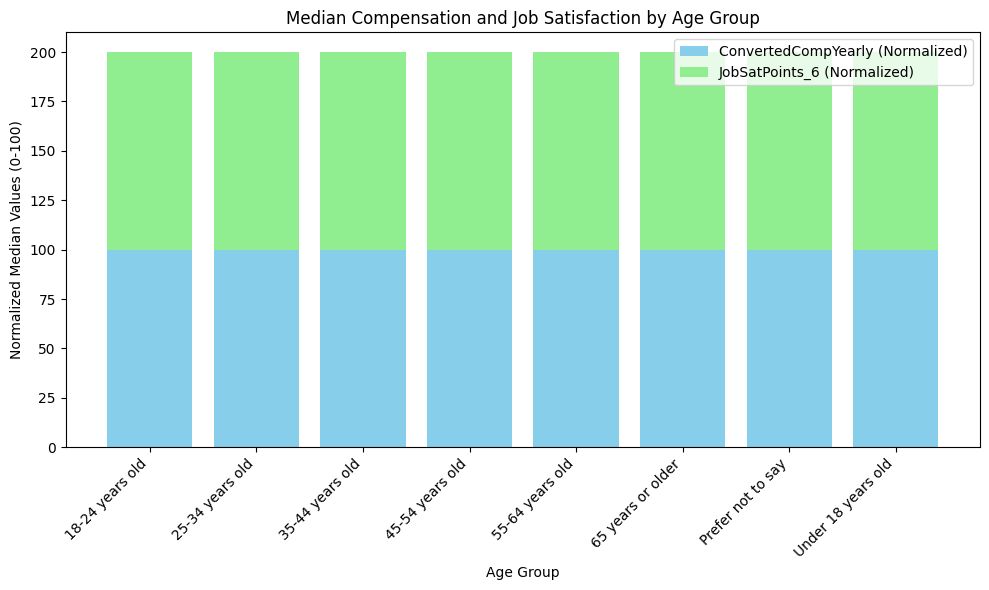

In [15]:
##Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("survey-data.csv")
print("Row count:", len(df))
print("Age unique values:", df['Age'].unique())

# Impute missing values
df['ConvertedCompYearly'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce').fillna(df['ConvertedCompYearly'].median())
df['JobSatPoints_6'] = pd.to_numeric(df['JobSatPoints_6'], errors='coerce').fillna(df['JobSatPoints_6'].median())

# Group by Age
age_group_satisfaction = df.groupby('Age')[['ConvertedCompYearly', 'JobSatPoints_6']].median().reset_index()

# Normalize
max_comp = age_group_satisfaction['ConvertedCompYearly'].max()
max_sat = age_group_satisfaction['JobSatPoints_6'].max()
age_group_satisfaction['ConvertedCompYearly_normalized'] = (age_group_satisfaction['ConvertedCompYearly'] / max_comp * 100) if max_comp > 0 else 0
age_group_satisfaction['JobSatPoints_6_normalized'] = (age_group_satisfaction['JobSatPoints_6'] / max_sat * 100) if max_sat > 0 else 0

# Plot
if age_group_satisfaction.empty:
    print("Error: No data to plot.")
else:
    plt.figure(figsize=(10, 6))
    plt.bar(age_group_satisfaction['Age'], 
            age_group_satisfaction['ConvertedCompYearly_normalized'], 
            label='ConvertedCompYearly (Normalized)', 
            color='skyblue')
    plt.bar(age_group_satisfaction['Age'], 
            age_group_satisfaction['JobSatPoints_6_normalized'], 
            bottom=age_group_satisfaction['ConvertedCompYearly_normalized'], 
            label='JobSatPoints_6 (Normalized)', 
            color='lightgreen')
    plt.xlabel('Age Group')
    plt.ylabel('Normalized Median Values (0-100)')
    plt.title('Median Compensation and Job Satisfaction by Age Group')
    plt.legend()
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

### Task 3: Comparing Data Using Stacked Charts


##### 1. Stacked Chart of Preferred Databases by Age Group




Visualize the top databases that respondents from different age groups wish to learn. Create a stacked chart to show the proportion of each database in each age group.


Row count: 65437
Age unique values: ['Under 18 years old' '35-44 years old' '45-54 years old'
 '18-24 years old' '25-34 years old' '55-64 years old' 'Prefer not to say'
 '65 years or older']
Top databases: ['PostgreSQL', 'SQLite', 'MySQL', 'MongoDB', 'Microsoft SQL Server']


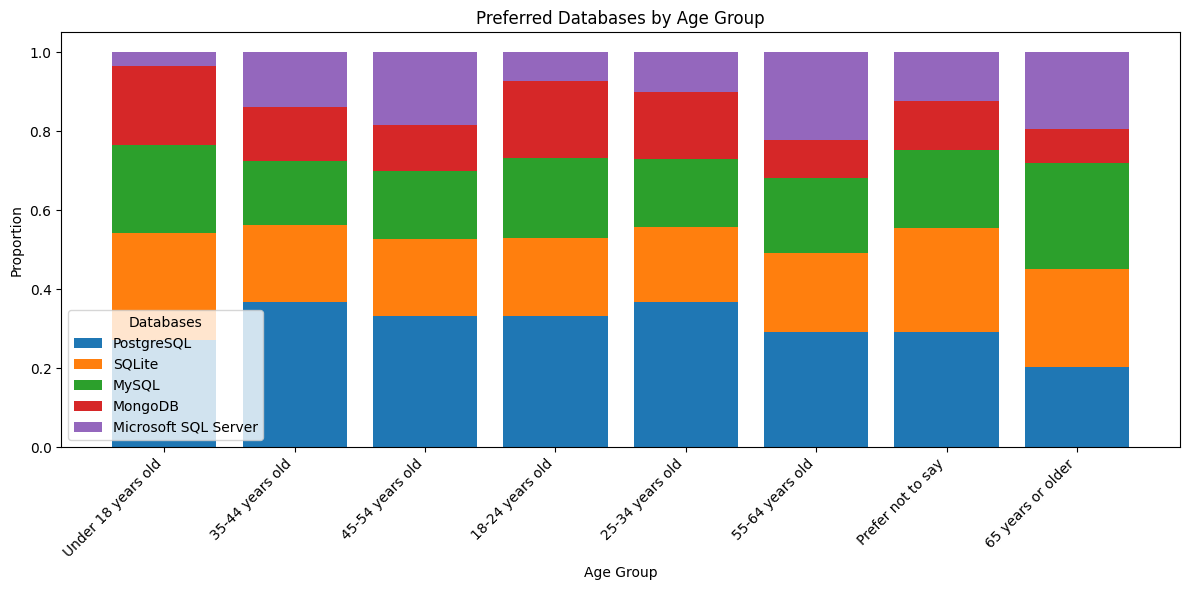

In [16]:
##Write your code here
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# Load dataset
df = pd.read_csv("survey-data.csv")
print("Row count:", len(df))
print("Age unique values:", df['Age'].unique())

# Impute missing values
df['DatabaseWantToWorkWith'] = df['DatabaseWantToWorkWith'].fillna('None')

# Process databases
database_counts = []
for age_group, group_data in df.groupby('Age'):
    databases = []
    for entry in group_data['DatabaseWantToWorkWith']:
        if entry and entry != 'None':
            databases.extend([db.strip() for db in entry.split(';')])
    counter = Counter(databases)
    total = sum(counter.values())
    proportions = {db: count / total if total > 0 else 0 for db, count in counter.items()}
    database_counts.append((age_group, proportions))

# Top 5 databases
total_counts = Counter()
for _, proportions in database_counts:
    for db, prop in proportions.items():
        total_counts[db] += prop
top_databases = [db for db, _ in total_counts.most_common(5)]
print("Top databases:", top_databases)

# Prepare plot data
plot_data = pd.DataFrame(0.0, index=df['Age'].unique(), columns=top_databases)
for age_group, proportions in database_counts:
    for db in top_databases:
        plot_data.loc[age_group, db] = proportions.get(db, 0)
plot_data = plot_data.div(plot_data.sum(axis=1), axis=0).fillna(0)

# Plot
if plot_data.empty:
    print("Error: No data to plot.")
else:
    plt.figure(figsize=(12, 6))
    bottom = pd.Series(0, index=plot_data.index)
    for db in top_databases:
        plt.bar(plot_data.index, plot_data[db], bottom=bottom, label=db)
        bottom += plot_data[db]
    plt.xlabel('Age Group')
    plt.ylabel('Proportion')
    plt.title('Preferred Databases by Age Group')
    plt.legend(title='Databases')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

##### 2. Stacked Chart of Employment Type by Job Satisfaction


Analyze the distribution of employment types within each job satisfaction level using a stacked chart. This will provide insights into how employment types are distributed across various satisfaction ratings.


Row count: 65437
Columns: ['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check', 'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline', 'TechDoc', 'YearsCode', 'YearsCodePro', 'DevType', 'OrgSize', 'PurchaseInfluence', 'BuyNewTool', 'BuildvsBuy', 'TechEndorse', 'Country', 'Currency', 'CompTotal', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith', 'LanguageAdmired', 'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith', 'DatabaseAdmired', 'PlatformHaveWorkedWith', 'PlatformWantToWorkWith', 'PlatformAdmired', 'WebframeHaveWorkedWith', 'WebframeWantToWorkWith', 'WebframeAdmired', 'EmbeddedHaveWorkedWith', 'EmbeddedWantToWorkWith', 'EmbeddedAdmired', 'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith', 'MiscTechAdmired', 'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith', 'ToolsTechAdmired', 'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'NEWCollabToolsAdmired', 'OpSysPersonal use', 'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith', 'Office

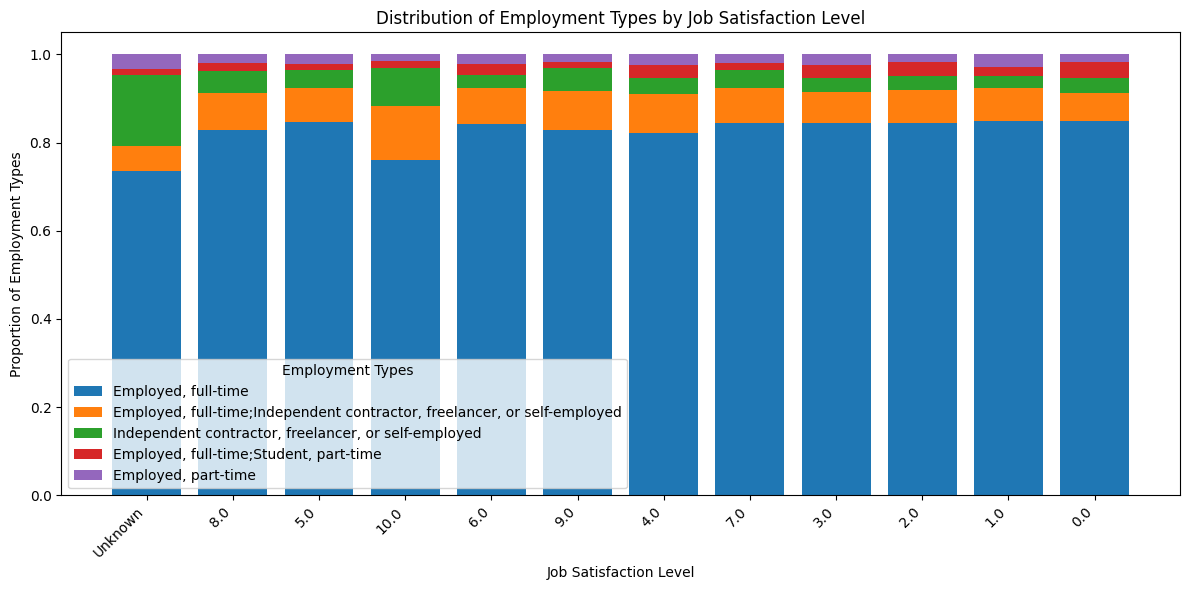

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# Load dataset
df = pd.read_csv("survey-data.csv")
print("Row count:", len(df))
print("Columns:", df.columns.tolist())
print("First few rows:\n", df.head())

# Check if DataFrame is empty
if df.empty:
    print("Error: DataFrame is empty. Check CSV file content.")
    exit()

# Step 1: Identify employment and job satisfaction columns
employment_col = None
satisfaction_col = None
possible_employment_cols = ['Employment', 'EmploymentStatus', 'MainBranch']
possible_satisfaction_cols = ['JobSat', 'JobSatisfaction', 'JobSatPoints_6']

for col in possible_employment_cols:
    if col in df.columns:
        employment_col = col
        break
for col in possible_satisfaction_cols:
    if col in df.columns:
        satisfaction_col = col
        break

if not employment_col or not satisfaction_col:
    print(f"Error: Missing columns. Employment: {employment_col}, Satisfaction: {satisfaction_col}")
    exit()

print(f"Using employment column: {employment_col}")
print(f"Using satisfaction column: {satisfaction_col}")
print(f"{employment_col} unique values:", df[employment_col].unique())
print(f"{satisfaction_col} unique values:", df[satisfaction_col].unique())

# Step 2: Debug data
print("Initial missing values:\n", df[[employment_col, satisfaction_col]].isna().sum())

# Step 3: Impute missing values
df[employment_col] = df[employment_col].fillna('Unknown')
if satisfaction_col == 'JobSatPoints_6':
    df[satisfaction_col] = pd.to_numeric(df[satisfaction_col], errors='coerce')
    sat_median = df[satisfaction_col].median() if not pd.isna(df[satisfaction_col].median()) else 0
    df[satisfaction_col] = df[satisfaction_col].fillna(sat_median)
else:
    df[satisfaction_col] = df[satisfaction_col].fillna('Unknown')

print("Missing values after imputation:\n", df[[employment_col, satisfaction_col]].isna().sum())

# Step 4: Bin JobSatPoints_6 if numeric
if satisfaction_col == 'JobSatPoints_6':
    # Use quantiles or data-specific ranges for binning
    bins = [-float('inf'), 33, 66, float('inf')]  # Adjust based on data range
    labels = ['Low', 'Medium', 'High']
    df['SatisfactionLevel'] = pd.cut(df[satisfaction_col], bins=bins, labels=labels, right=False)
    df['SatisfactionLevel'] = df['SatisfactionLevel'].astype(str)  # Ensure string type
    group_col = 'SatisfactionLevel'
else:
    df[satisfaction_col] = df[satisfaction_col].astype(str)  # Ensure string type
    group_col = satisfaction_col

print(f"Grouping by: {group_col}")
print(f"{group_col} value counts:\n", df[group_col].value_counts(dropna=False))

# Step 5: Calculate proportions of employment types per satisfaction level
employment_counts = []
for sat_level, group_data in df.groupby(group_col):
    counter = Counter(group_data[employment_col])
    total = sum(counter.values())
    proportions = {emp: count / total if total > 0 else 0 for emp, count in counter.items()}
    employment_counts.append((sat_level, proportions))

# Step 6: Select top employment types
all_employment_types = set()
for _, proportions in employment_counts:
    all_employment_types.update(proportions.keys())
total_counts = Counter()
for _, proportions in employment_counts:
    for emp, prop in proportions.items():
        total_counts[emp] += prop
top_employment_types = [emp for emp, _ in total_counts.most_common(5)]  # Limit to top 5
print("Top employment types:", top_employment_types)

# Step 7: Prepare data for plotting
plot_data = pd.DataFrame(0.0, index=df[group_col].unique().astype(str), columns=top_employment_types)
for sat_level, proportions in employment_counts:
    for emp in top_employment_types:
        plot_data.loc[str(sat_level), emp] = proportions.get(emp, 0)

# Normalize to ensure proportions sum to 100%
plot_data = plot_data.div(plot_data.sum(axis=1), axis=0).fillna(0)
print("Plot data:\n", plot_data)

# Step 8: Plot stacked bar chart
if plot_data.empty or plot_data.isna().all().all():
    print("Error: No valid data to plot. Check employment and satisfaction values.")
else:
    plt.figure(figsize=(12, 6))
    bottom = pd.Series(0, index=plot_data.index)
    for emp in top_employment_types:
        plt.bar(plot_data.index, plot_data[emp], bottom=bottom, label=emp)
        bottom += plot_data[emp]
    plt.xlabel('Job Satisfaction Level')
    plt.ylabel('Proportion of Employment Types')
    plt.title('Distribution of Employment Types by Job Satisfaction Level')
    plt.legend(title='Employment Types')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

### Task 4: Exploring Technology Preferences Using Stacked Charts


##### 1. Stacked Chart for Preferred Programming Languages by Age Group


Analyze how programming language preferences (`LanguageAdmired`) vary across age groups.


Row count: 65437
Columns: ['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check', 'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline', 'TechDoc', 'YearsCode', 'YearsCodePro', 'DevType', 'OrgSize', 'PurchaseInfluence', 'BuyNewTool', 'BuildvsBuy', 'TechEndorse', 'Country', 'Currency', 'CompTotal', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith', 'LanguageAdmired', 'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith', 'DatabaseAdmired', 'PlatformHaveWorkedWith', 'PlatformWantToWorkWith', 'PlatformAdmired', 'WebframeHaveWorkedWith', 'WebframeWantToWorkWith', 'WebframeAdmired', 'EmbeddedHaveWorkedWith', 'EmbeddedWantToWorkWith', 'EmbeddedAdmired', 'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith', 'MiscTechAdmired', 'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith', 'ToolsTechAdmired', 'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'NEWCollabToolsAdmired', 'OpSysPersonal use', 'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith', 'Office

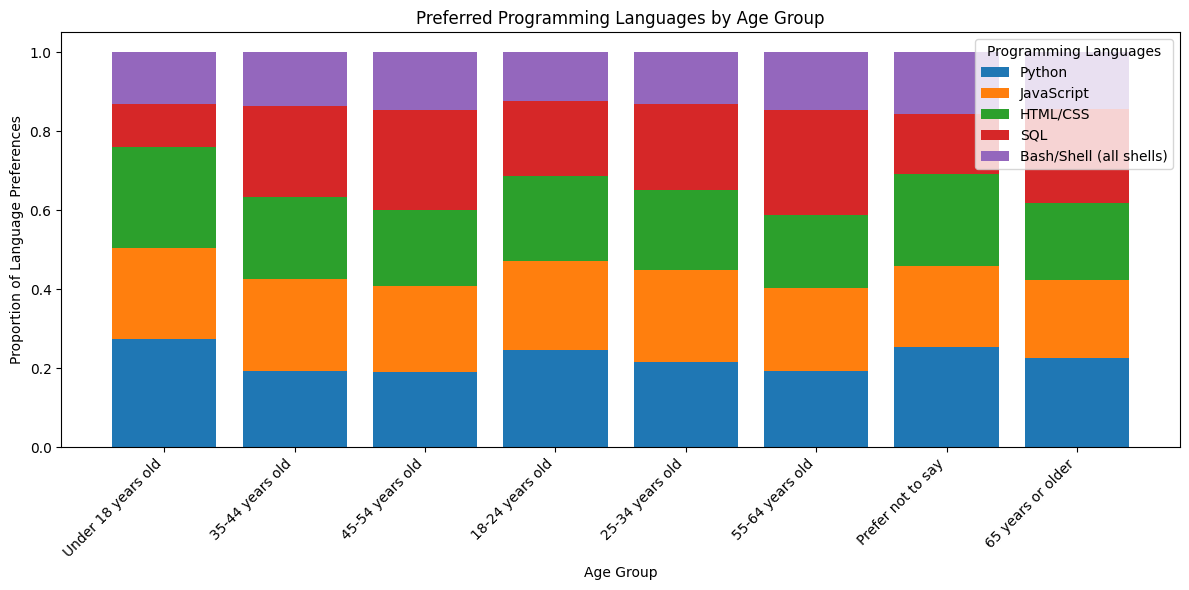

In [19]:
##Write your code here
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# Load dataset
df = pd.read_csv("survey-data.csv")
print("Row count:", len(df))
print("Columns:", df.columns.tolist())
print("First few rows:\n", df.head())

# Check if DataFrame is empty
if df.empty:
    print("Error: DataFrame is empty. Check CSV file content.")
    exit()

# Step 1: Check required columns
required_columns = ['Age', 'LanguageAdmired']
missing_columns = [col for col in required_columns if col not in df.columns]
if missing_columns:
    print(f"Error: Missing columns: {missing_columns}")
    exit()

print("Age unique values:", df['Age'].unique())
print("LanguageAdmired sample:", df['LanguageAdmired'].head().tolist())

# Step 2: Debug data
print("Initial missing values:\n", df[['Age', 'LanguageAdmired']].isna().sum())

# Step 3: Impute missing values
df['LanguageAdmired'] = df['LanguageAdmired'].fillna('None')
df['Age'] = df['Age'].fillna('Unknown')

# Step 4: Handle Age column
if df['Age'].dtype in ['int64', 'float64'] or df['Age'].apply(lambda x: isinstance(x, (int, float))).all():
    # Numeric Age: Create age groups
    df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
    age_median = df['Age'].median() if not pd.isna(df['Age'].median()) else 30
    df['Age'] = df['Age'].fillna(age_median)
    bins = [0, 18, 25, 35, 45, 55, 65, 100]
    labels = ['Under 18', '18-24', '25-34', '35-44', '45-54', '55-64', '65+']
    df['AgeCategory'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
    df['AgeCategory'] = df['AgeCategory'].astype(str)  # Ensure string type
    group_col = 'AgeCategory'
else:
    # Categorical Age: Use as-is
    df['Age'] = df['Age'].astype(str)  # Ensure string type
    group_col = 'Age'

print(f"Grouping by: {group_col}")
print(f"{group_col} value counts:\n", df[group_col].value_counts(dropna=False))

# Step 5: Process language preferences
language_counts = []
for age_group, group_data in df.groupby(group_col):
    languages = []
    for entry in group_data['LanguageAdmired']:
        if entry and entry != 'None':
            languages.extend([lang.strip() for lang in entry.split(';')])
    counter = Counter(languages)
    total = sum(counter.values())
    proportions = {lang: count / total if total > 0 else 0 for lang, count in counter.items()}
    language_counts.append((age_group, proportions))

# Step 6: Select top languages
all_languages = set()
for _, proportions in language_counts:
    all_languages.update(proportions.keys())
total_counts = Counter()
for _, proportions in language_counts:
    for lang, prop in proportions.items():
        total_counts[lang] += prop
top_languages = [lang for lang, _ in total_counts.most_common(5)]  # Limit to top 5
print("Top languages:", top_languages)

# Step 7: Prepare data for plotting
plot_data = pd.DataFrame(0.0, index=df[group_col].unique().astype(str), columns=top_languages)
for age_group, proportions in language_counts:
    for lang in top_languages:
        plot_data.loc[str(age_group), lang] = proportions.get(lang, 0)

# Normalize to ensure proportions sum to 100%
plot_data = plot_data.div(plot_data.sum(axis=1), axis=0).fillna(0)
print("Plot data:\n", plot_data)

# Step 8: Plot stacked bar chart
if plot_data.empty or plot_data.isna().all().all():
    print("Error: No valid data to plot. Check Age and LanguageAdmired values.")
else:
    plt.figure(figsize=(12, 6))
    bottom = pd.Series(0, index=plot_data.index)
    for lang in top_languages:
        plt.bar(plot_data.index, plot_data[lang], bottom=bottom, label=lang)
        bottom += plot_data[lang]
    plt.xlabel('Age Group')
    plt.ylabel('Proportion of Language Preferences')
    plt.title('Preferred Programming Languages by Age Group')
    plt.legend(title='Programming Languages')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

##### 2. Stacked Chart for Technology Adoption by Employment Type


Explore how admired platforms (`PlatformAdmired`) differ across employment types (e.g., full-time, freelance)


Row count: 65437
Columns: ['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check', 'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline', 'TechDoc', 'YearsCode', 'YearsCodePro', 'DevType', 'OrgSize', 'PurchaseInfluence', 'BuyNewTool', 'BuildvsBuy', 'TechEndorse', 'Country', 'Currency', 'CompTotal', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith', 'LanguageAdmired', 'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith', 'DatabaseAdmired', 'PlatformHaveWorkedWith', 'PlatformWantToWorkWith', 'PlatformAdmired', 'WebframeHaveWorkedWith', 'WebframeWantToWorkWith', 'WebframeAdmired', 'EmbeddedHaveWorkedWith', 'EmbeddedWantToWorkWith', 'EmbeddedAdmired', 'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith', 'MiscTechAdmired', 'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith', 'ToolsTechAdmired', 'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'NEWCollabToolsAdmired', 'OpSysPersonal use', 'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith', 'Office

/tmp/ipykernel_833/896343957.py:91: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


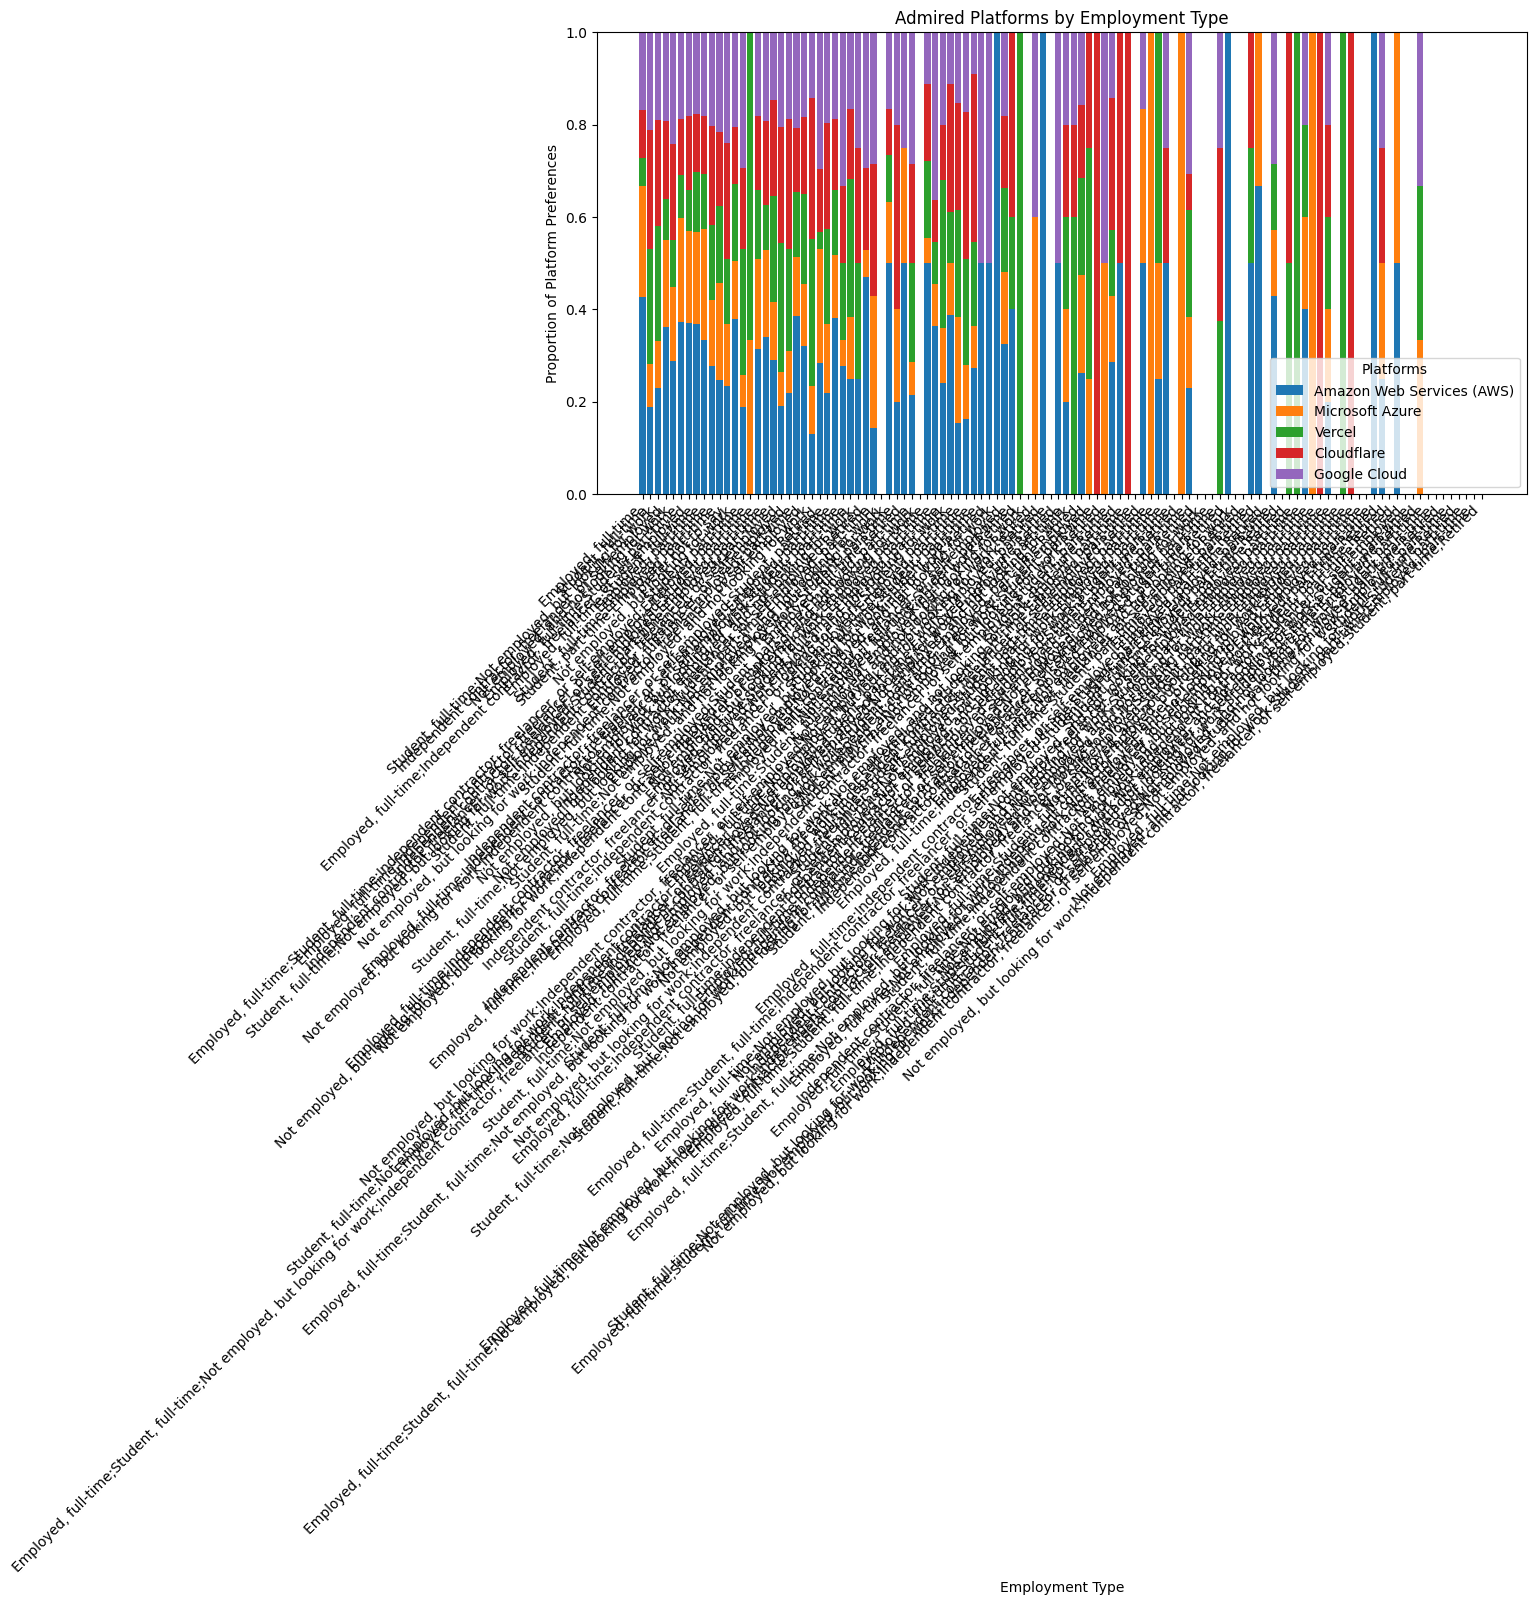

In [20]:
##Write your code here
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# Load dataset
df = pd.read_csv("survey-data.csv")
print("Row count:", len(df))
print("Columns:", df.columns.tolist())
print("First few rows:\n", df.head())

# Check if DataFrame is empty
if df.empty:
    print("Error: DataFrame is empty. Check CSV file content.")
    exit()

# Step 1: Identify employment and platform columns
employment_col = None
platform_col = 'PlatformAdmired'
possible_employment_cols = ['Employment', 'EmploymentStatus', 'MainBranch']

for col in possible_employment_cols:
    if col in df.columns:
        employment_col = col
        break

if not employment_col or platform_col not in df.columns:
    print(f"Error: Missing columns. Employment: {employment_col}, PlatformAdmired: {platform_col in df.columns}")
    exit()

print(f"Using employment column: {employment_col}")
print(f"{employment_col} unique values:", df[employment_col].unique())
print(f"{platform_col} sample:", df[platform_col].head().tolist())

# Step 2: Debug data
print("Initial missing values:\n", df[[employment_col, platform_col]].isna().sum())

# Step 3: Impute missing values
df[employment_col] = df[employment_col].fillna('Unknown')
df[platform_col] = df[platform_col].fillna('None')

print("Missing values after imputation:\n", df[[employment_col, platform_col]].isna().sum())

# Step 4: Process platform preferences
platform_counts = []
for emp_type, group_data in df.groupby(employment_col):
    platforms = []
    for entry in group_data[platform_col]:
        if entry and entry != 'None':
            platforms.extend([plat.strip() for plat in entry.split(';')])
    counter = Counter(platforms)
    total = sum(counter.values())
    proportions = {plat: count / total if total > 0 else 0 for plat, count in counter.items()}
    platform_counts.append((emp_type, proportions))

# Step 5: Select top platforms
all_platforms = set()
for _, proportions in platform_counts:
    all_platforms.update(proportions.keys())
total_counts = Counter()
for _, proportions in platform_counts:
    for plat, prop in proportions.items():
        total_counts[plat] += prop
top_platforms = [plat for plat, _ in total_counts.most_common(5)]  # Limit to top 5
print("Top platforms:", top_platforms)

# Step 6: Prepare data for plotting
plot_data = pd.DataFrame(0.0, index=df[employment_col].unique().astype(str), columns=top_platforms)
for emp_type, proportions in platform_counts:
    for plat in top_platforms:
        plot_data.loc[str(emp_type), plat] = proportions.get(plat, 0)

# Normalize to ensure proportions sum to 100%
plot_data = plot_data.div(plot_data.sum(axis=1), axis=0).fillna(0)
print("Plot data:\n", plot_data)

# Step 7: Plot stacked bar chart
if plot_data.empty or plot_data.isna().all().all():
    print("Error: No valid data to plot. Check employment and PlatformAdmired values.")
else:
    plt.figure(figsize=(12, 6))
    bottom = pd.Series(0, index=plot_data.index)
    for plat in top_platforms:
        plt.bar(plot_data.index, plot_data[plat], bottom=bottom, label=plat)
        bottom += plot_data[plat]
    plt.xlabel('Employment Type')
    plt.ylabel('Proportion of Platform Preferences')
    plt.title('Admired Platforms by Employment Type')
    plt.legend(title='Platforms')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

### Final Step: Review


In this lab, you focused on using stacked charts to understand the composition and comparison within the dataset. Stacked charts provided insights into job satisfaction, compensation, and preferred databases across age groups and employment types.


## Summary


After completing this lab, you will be able to:

- Use stacked charts to analyze the composition of data across categories, such as job satisfaction and compensation by age group.

- Compare data across different dimensions using stacked charts, enhancing your ability to communicate complex relationships in the data.

- Visualize distributions across multiple categories, such as employment type by satisfaction, to gain a deeper understanding of patterns within the dataset.


## Author:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-28|1.2|Madhusudhan Moole|Updated lab|
|2024-10-16|1.1|Madhusudhan Moole|Updated lab|
|2024-10-15|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
